In [1]:
import pandas as pd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

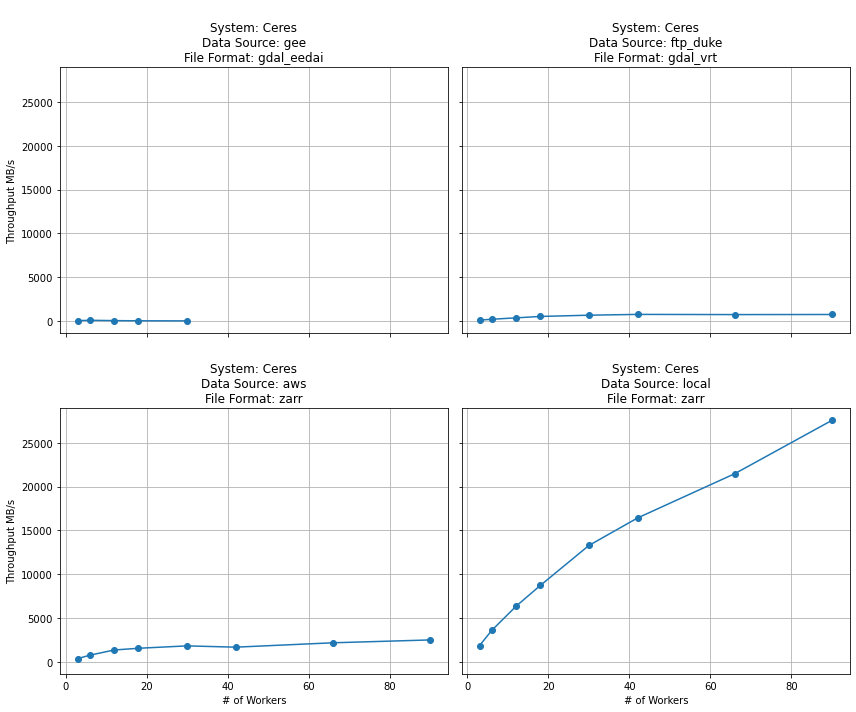

In [2]:
df = pd.concat([pd.read_csv(f) for f in glob('./Python*.csv')],ignore_index=True)
grouped = df.groupby(by=['system','format','cloud_source'])

ncols=2
nrows = int(np.ceil(grouped.ngroups/ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,10), sharey=True,sharex=True)

for (key, ax) in zip(grouped.groups.keys(), axes.flatten()):
    system, d_format, cloud_source = key
    grouped.get_group(key).plot(ax=ax,
                                x='nworkers',
                                y='throughput_MBps',
                                title='\nSystem: '+system+'\nData Source: '+cloud_source+'\nFile Format: '+d_format,
                                grid=True,
                                style='.-',
                                ylabel='Throughput MB/s',
                                xlabel='# of Workers',
                                ms=12,
                                legend=False)
plt.tight_layout()

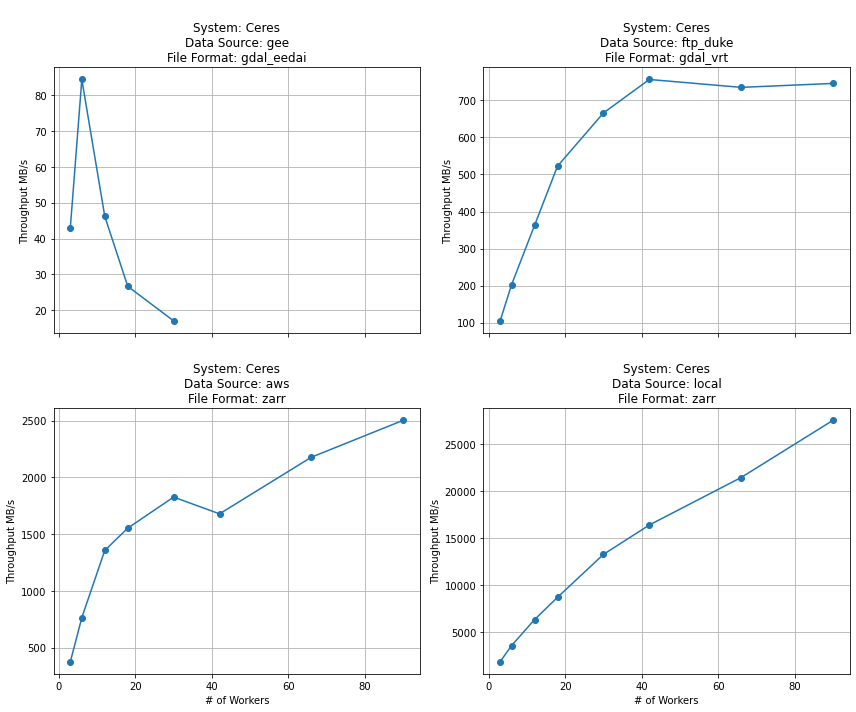

In [3]:
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,10), sharey=False,sharex=True)

for (key, ax) in zip(grouped.groups.keys(), axes.flatten()):
    system, d_format, cloud_source = key
    grouped.get_group(key).plot(ax=ax,
                                x='nworkers',
                                y='throughput_MBps',
                                title='\nSystem: '+system+'\nData Source: '+cloud_source+'\nFile Format: '+d_format,
                                grid=True,
                                style='.-',
                                ylabel='Throughput MB/s',
                                xlabel='# of Workers',
                                ms=12,
                                legend=False)
plt.tight_layout()
plt.savefig('benchmark_res.png',dpi=300)